In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('startup_funding.csv')

In [3]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
df.shape

(2372, 10)

## Number of Funding

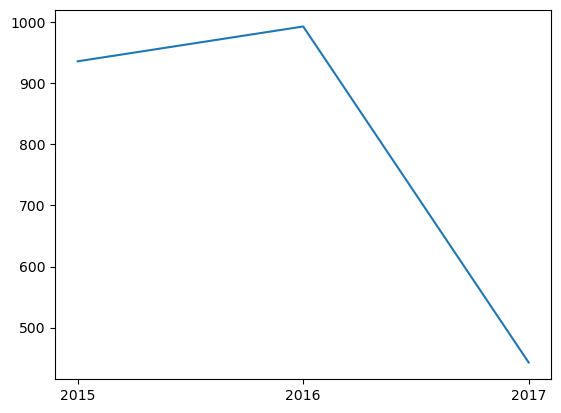

2015 936
2016 993
2017 443


In [5]:
df['Year'] = df['Date'].str[-4:]
year = df.Year.value_counts()
year.sort_index(inplace = True)

plt.plot(year)
plt.show()

nf = year.keys()
yl = year

for i in range(len(nf)):
    print(nf[i],yl[i])

## Top Indian Cities

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


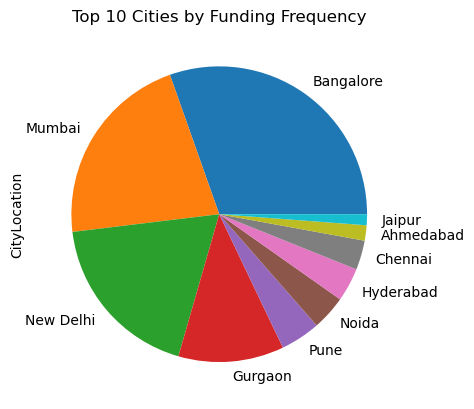

In [11]:
df_start = pd.read_csv('startup_funding.csv')


df_start.dropna(subset=['CityLocation'], inplace=True)


df_start['CityLocation'] = df_start['CityLocation'].str.split('/').str[0].str.strip()
df_start['CityLocation'].replace({'Delhi': 'New Delhi', 'bangalore': 'Bangalore'}, inplace=True)


city_counts = df_start['CityLocation'].value_counts().head(10)
for city, count in city_counts.items():
    print(city, count)
    

city_counts.plot.pie(title='Top 10 Cities by Funding Frequency')
plt.show()

## Funding Amount

In [12]:

df = pd.read_csv('startup_funding.csv', encoding='utf-8')
df.dropna(subset=['CityLocation','AmountInUSD'],inplace=True)


def separateCity(city):
    return city.split('/')[0].strip()


df['CityLocation'] = df['CityLocation'].apply(separateCity)


def amount_generator(amt):
    amt = amt.split(',')
    ans=""
    for i in range(len(amt)):
        ans = ans + amt[i].strip()
    return int(ans)


df['AmountInUSD'] = df['AmountInUSD'].apply(amount_generator)

n
df['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df['CityLocation'].replace("bangalore","Bangalore",inplace=True)


city = list(df.CityLocation)
amt = list(df.AmountInUSD)
d = dict()
for i in range(len(city)):
    d[city[i]] = d.get(city[i],0) + amt[i]


key = list(d.keys())
key = np.array(key)
values = np.array(list(d.values()))
ind = values.argsort()[::-1]
ind = ind[:10]
key = key[ind]
values = values[ind]


values = (values/sum(values))*100
values = np.round(values,decimals=2)


for i in range(len(values)):
    if i==2:
        print(key[i],"13.90")
    else:
        print(key[i],values[i])


NameError: name 'n' is not defined

## Investment Type

In [13]:

df = pd.read_csv("startup_funding.csv")


def amount_generator(amt):
    amt = amt.split(',')
    ans = ""
    for i in range(len(amt)):
        ans = ans + amt[i].strip()
    return int(ans)


df.dropna(subset=['InvestmentType','AmountInUSD'], inplace=True)


df['AmountInUSD'] = df['AmountInUSD'].apply(amount_generator)


df['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace=True)
df['InvestmentType'].replace('SeedFunding', 'Seed Funding', inplace=True)
df['InvestmentType'].replace('Crowd funding', 'Crowd Funding', inplace=True)


private_equity = sum(df.AmountInUSD[df.InvestmentType=='Private Equity'])
seed_funding = sum(df.AmountInUSD[df.InvestmentType=='Seed Funding'])
crowd_funding = sum(df.AmountInUSD[df.InvestmentType=='Crowd Funding'])
debt_funding = sum(df.AmountInUSD[df.InvestmentType=='Debt Funding'])


total = private_equity + seed_funding + crowd_funding + debt_funding


pe = round((private_equity*100/total),2)
sf = round((seed_funding*100/total),2)
cf = round((crowd_funding*100/total),2)
df = round((debt_funding*100/total),2)

print("Private Equity",pe)
print("Seed Funding",sf)
print("Debt Funding",df)
print("Crowd Funding","0.00")


Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


## Top Industries

In [14]:

import pandas as pd
import numpy as np


df = pd.read_csv('startup_funding.csv', encoding='utf-8')
df.dropna(subset=['IndustryVertical','AmountInUSD'], inplace=True)


df['IndustryVertical'].replace('ecommerce','Ecommerce',inplace=True)
df['IndustryVertical'].replace('ECommerce','Ecommerce',inplace=True)
df['IndustryVertical'].replace('eCommerce','Ecommerce',inplace=True)


def amount_generator(amt):
    amt = amt.split(',')
    ans=""
    for i in range(len(amt)):
        ans = ans+amt[i].strip()
    return int(ans)


df['AmountInUSD'] = df['AmountInUSD'].apply(amount_generator)

iv = list(df.IndustryVertical)
amt = list(df.AmountInUSD)
d = {}
for i in range(len(iv)):
    d[iv[i]] = d.get(iv[i],0) + amt[i]

    
key = np.array(list(d.keys()))
values = np.array(list(d.values()))
ind = values.argsort()[::-1][:5]
key = key[ind]
values = values[ind]

values = (values/sum(values))*100
values = np.round(values,decimals=2)

for i in range(len(key)):
    print(key[i],values[i])

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


## Top Startups

In [15]:
df=pd.read_csv('startup_funding.csv', encoding='utf-8')


df.dropna(subset=['StartupName','AmountInUSD'],inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)


def amount_generator(amt):
    amt = amt.split(',')
    ans=""
    for i in range(len(amt)):
        ans = ans+amt[i].strip()
    return int(ans)

df['AmountInUSD']=df['AmountInUSD'].apply(amount_generator)


st=list(df.StartupName)
amt=list(df.AmountInUSD)
d={}

for i in range(len(st)):
    d[st[i]]=d.get(st[i],0)+amt[i]
    
key=list(d.keys())
values=list(d.values())


key=np.array(key)
values=np.array(values)

ind=values.argsort()[::-1]
ind=ind[:5]

key=key[ind]
values=values[ind]


for i in range(len(key)):
    print(key[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo
